* 
## datasets数据库   sklearn.datasets
* 
API Reference — scikit-learn 0.20.3 documentation https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [37]:
load_data = datasets.make_regression(n_features = 1, noise = 1) 
data_X = load_data[0]
data_y = load_data[1]

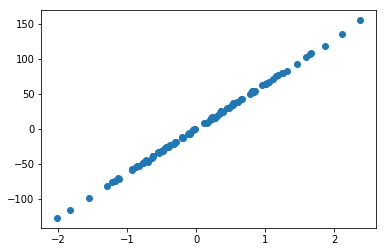

In [38]:
# print(data_X[:2,:])
# print(data_y[:2])
import matplotlib.pyplot as plt
plt.scatter(data_X, data_y)
plt.show()

In [39]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size = 0.2)

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[ 17.29646602  63.77570615  34.42114244 -41.03780959  15.08872389
  19.91966024  84.33475511 -55.6488461  -39.91923097  54.55700984
 -71.81350135 -23.88456421  32.46170171  42.26861588 -32.32184132
 -18.17192319  80.05361429 106.14649672  22.06944101  -0.40099416]
[ 15.44648989  63.76686053  33.51937379 -42.38807537  13.35182426
  18.78574233  82.32539905 -55.04591898 -39.31856438  53.51756018
 -70.49926318 -23.75800011  32.97738111  41.88913653 -31.91090831
 -19.18820162  79.31204137 107.26915794  22.09156279   0.11984638]


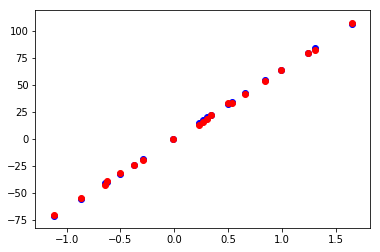

In [41]:
print(model.predict(X_test))
print(y_test)
plt.scatter(X_test, model.predict(X_test), c='b')
plt.scatter(X_test, y_test, c='r')
plt.show()

*  
## model
* 
### 属性  
model.intercept_  
model.coef_  
* 
### 功能  
model.predict  
model.score  

In [43]:
print(model.intercept_)
print(model.coef_)

0.18496584583347042
[64.11284559]


In [45]:
print(model.score(data_X,data_y))

0.9996820310730097


* 
分数  
Accuracy  
R2  
f1

* 
## 数据预处理
* 
### 标准化

In [3]:
from sklearn import preprocessing
import numpy as np

from sklearn.datasets.samples_generator import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import matplotlib.pyplot as plt

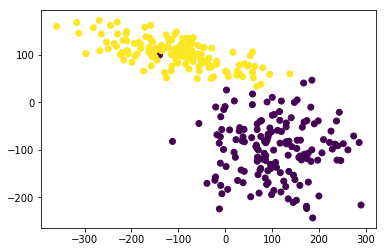

In [122]:
data_X, data_y = make_classification(n_samples = 300, n_features = 2, n_classes = 2,
                                     n_informative = 2, n_redundant = 0, 
                                     n_clusters_per_class = 1, scale = 100)
plt.scatter(data_X[:,0], data_X[:,1], c = data_y)
plt.show()

In [123]:
# data_X = preprocessing.scale(data_X)
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size = 0.2)
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.4166666666666667

In [124]:
data_X = preprocessing.scale(data_X)
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size = 0.2)
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

*  
## 模型评价
* 
### 交叉验证

In [125]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [131]:
data = datasets.load_iris()
data_X = iris.data
data_y = iris.target 

In [134]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size = 0.3)

In [135]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9777777777777777


In [141]:
from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, data_X, data_y, cv=5, scoring='accuracy')
print(scores.mean())

0.9733333333333334


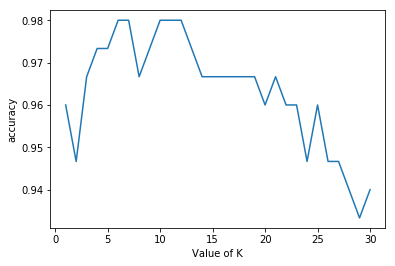

In [148]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, data_X, data_y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('Value of K')
plt.ylabel('accuracy')
plt.show()

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']

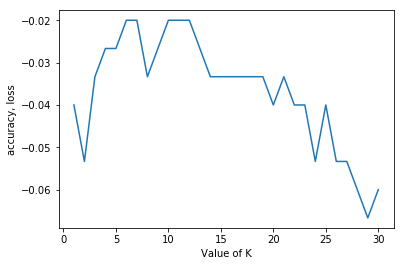

In [157]:
k_range = range(1, 31)
k_score = []
k_loss = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = cross_val_score(knn, data_X, data_y, cv=5, scoring='neg_mean_squared_error')
    score = cross_val_score(knn, data_X, data_y, cv=5, scoring='accuracy')
    k_score.append(score.mean())
    k_loss.append(loss.mean())
import matplotlib.pyplot as plt
# plt.plot(k_range, k_score)
plt.plot(k_range, k_loss)
plt.xlabel('Value of K')
plt.ylabel('accuracy, loss')
plt.show()

In [158]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC

from sklearn.learning_curve import learning_curve

import numpy as np

import matplotlib.pyplot as plt

In [159]:
data = load_digits()
data_X = data.data
data_y = data.target

In [185]:
model = SVC(gamma=0.01)

In [186]:
train_sizes, train_loss, test_loss = learning_curve(model, data_X, data_y,
                                                   cv = 10, scoring='neg_mean_squared_error',
                                                   train_sizes=[0.1,0.25,0.5,0.75,1])
train_loss_mean = -np.mean(train_loss, axis=1) 
test_loss_mean = -np.mean(test_loss, axis=1) 

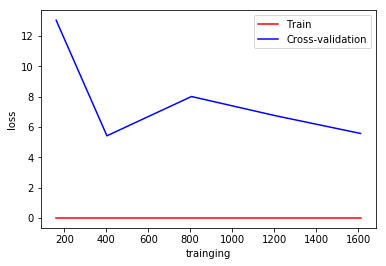

In [187]:
plt.plot(train_sizes, train_loss_mean, c='r', label='Train')
plt.plot(train_sizes, test_loss_mean, c='b', label='Cross-validation')
plt.xlabel('trainging')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

In [189]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC

from sklearn.learning_curve import validation_curve

import numpy as np

import matplotlib.pyplot as plt

In [190]:
data = load_digits()
data_X = data.data
data_y = data.target

In [191]:
model = SVC(gamma=0.01)

In [194]:
param_range = np.logspace(-6, -2.3, 5)
train_loss, test_loss = validation_curve(model, data_X, data_y,
                                       cv = 10, param_name='gamma', param_range= param_range, 
                                       scoring='neg_mean_squared_error')
train_loss_mean = -np.mean(train_loss, axis=1) 
test_loss_mean = -np.mean(test_loss, axis=1) 

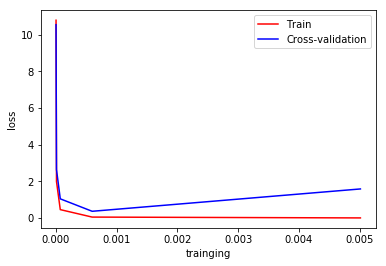

In [195]:
plt.plot(param_range, train_loss_mean, c='r', label='Train')
plt.plot(param_range, test_loss_mean, c='b', label='Cross-validation')
plt.xlabel('trainging')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

*  
## save

In [196]:
from sklearn import svm
from sklearn import datasets

In [199]:
model = svm.SVC()
data = datasets.load_iris()
data_X = data.data
data_y = data.target
model.fit(data_X, data_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

method 1: pickle

In [208]:
import pickle
# save
with open('clf.pickle', 'wb') as f:
    pickle.dump(model, f)
# restore
with open('clf.pickle', 'rb') as f:
    model = pickle.load(f)

method 2: joblib

In [210]:
from sklearn.externals import joblib
# save
joblib.dump(model, 'clf2.plk')
# restore
model2 = joblib.load('clf2.plk')